# Integration and Visualization
- YOUR NAME: Sebastião Manuel Inácio Rosalino
- YOUR VUNetID: sxx209

(If you do not provide your NAME and VUNetID we will not accept your submission.)

**To hand in: one zip file, containing...**
- this file, with completed tasks
- the ontology you made in the previous assignment
- an ontology you found on the web
- an integrated ontology (`mapping.ttl`)

## Task 1 (2 Points):  Integrating ontologies in Protégé
Take the ontology you built for Module 4 (let’s call it ontology A), and find either a fellow student with a similar ontology or an ontology on the web on similar domain. That will be our ontology B. 

Create an empty ontology in Protégé (ontology C), and import both ontologies. 

Define at least 6 mappings as following:

-    1 mapping between a class from A and a class from B using rdfs:subClassOf 
-    1 mapping between a class from A and a class from B using owl:equivalentClass
-    1 mapping between a property from A and a property from B using rdfs:subPropertyOf
-    1 mapping between a property from A and a property from B using either owl:equivalentProperty, owl:disjointProperty, owl:inverseOf, or owl:propertyChainAxiom
-    1 mapping between an individual from A and an individual from B using owl:differentFrom
-    1 mapping between an individual from A and an individual from B using owl:sameAs 

The combined ontology should be **consistent**.

Save the ontology as Turtle, where the filename is ‘`mapping.ttl`’

Add all three ontologies to the ZIP file of this assignment, leaving preserved the original file names of the ontologies.

In [1]:
# Required libraries

from rdflib import Graph, RDF, Namespace, Literal, URIRef
from SPARQLWrapper import SPARQLWrapper, JSON

In [3]:
# Recalling my previous assignment's ontology. I'll use some past pre-made functions to load and give a look at it.

def load_graph(graph, filename):
    with open(filename, 'r') as f:
        graph.parse(f, format='turtle')

def serialize_graph(myGraph):
     print(myGraph.serialize(format='turtle'))
        
ontology_a = Graph()
        
load_graph(ontology_a, 'sebastiao_rosalino_assignment_4_turtle')

serialize_graph(ontology_a)

@prefix : <http://www.semanticweb.org/sebas/ontologies/knowledge_and_data/assignment_4#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://www.semanticweb.org/sebas/ontologies/knowledge_and_data/assignment_4> a owl:Ontology ;
    rdfs:comment """This work's ontology is under academic context and presents their main actors and describes its domains of action. The Vrije Univesity was considered as the universe for the application of this Ontology, aimed at its main academic agents and beyond.

Eight classes were considered for the development of Ontology, namely: Faculties, Majors and, within these, the most Popular Majores, Courses, Research Areas and People (human resources) and within this class the Teachers and Students subclasses. For each class, at least two instances were created, to which object and date p

In [4]:
# Now, moving on to the ontology I found on the Web (https://zenodo.org/record/4129774#.Yzw_sHZBy3C), I'll load it and give
# it a look

ontology_b = open('Course Ontology Vrije Universiteit.ttl', encoding="utf8")

#for line in ontology_b:
#    print(line)

# The print was suspended due to the time issues. The print is of course possible, however it could take more than 2 minutes.

In [5]:
mapping = open('mapping.ttl', encoding="utf8")

#print(open('mapping.ttl').read())

## Mappings established

### 1) 1 Mapping between a class from A and a class from B using rdfs:subClassOf

         sebas:students rdfs:subClassOf vu:People .
         
 
### 2) 1 mapping between a class from A and a class from B using owl:equivalentClass

        sebas:course owl:equivalentClass teach:course .


### 3) 1 mapping between a property from A and a property from B using rdfs:subPropertyOf

        sebas:belongsTo rdfs:subPropertyOf vu:offeredByFaculty .
        
        
### 4) 1 mapping between a property from A and a property from B using either owl:equivalentProperty, owl:disjointProperty, owl:inverseOf, or owl:propertyChainAxiom

        sebas:teaches owl:inverseOf vu:taughtBy .
       
       
### 5) 1 mapping between an individual from A and an individual from B using owl:differentFrom

        sebas:VictorDeBoer owl:differentFrom vu:prof_dr_C_Fonseca_Guerra .
        

### 6) 1 mapping between an individual from A and an individual from B using owl:sameAs

        sebas:K.S_Schlobach owl:sameAs vu:dr_KS_Schlobach .

## Task 2 (1 Point):  Explain your mapping

Please explain in a few sentences in the text field below the mapping you made in the previous question:

**1.º Mapping: between a class from A and a class from B using rdfs:subClassOf**

Explanation:

Class student (from A) can be mapped to the class people (from B), through the subclass relationship: rdfs:subClassOf. This means that any instance (student) that belongs to class sebas:students is also of type vu:people. In other words, every student is a person.

**2.º Mapping: between a class from A and a class from B using owl:equivalentClass**

Explanation:

Class course (from A) can be mapped to the course class (from B), through the class equivalence relation: owl:equivalentClass. This means that any instance that belongs to one of the classes (from any of the ontologies) can be integrated into the other. This means that, any course can belong to any of the classes.

**3.º Mapping: between a property from A and a property from B using rdfs:subPropertyOf**

Explanation:

The Object property sebas:belongsTo from A can be mapped to the object property vu:offeredByFaculty from B by using the subproperty relation rdfs:subPropertyOf.
This is true because in ontology A the use of belongsTo determines that a Course belongs to a Major and in ontology B the use of offeredByFaculty determines that a Major is offered by a faculty. Therefore, a course is always offered by a faculty, which means that the belongsTo property is a lower specification than the offeredByFaculty property.

**4.º Mapping: between a property from A and a property from B using either owl:equivalentProperty, owl:disjointProperty, owl:inverseOf, or owl:propertyChainAxiom**

Explanation:

I chose owl:inverseOf.
The Object property sebas:teaches from A can be mapped to the object property vu:taughtBy from B by using owl:inverseOf.
This is true because in ontology A the object property sebas:teaches is used to determine that a teacher teaches a course. Whereas, in ontology B the vu:taughtBy object property is used to determine that a course is taught by a teacher. This means that, they are inverse properties.

**5.º Mapping: between an individual from A and an individual from B using owl:differentFrom**

Explanation:

The instance of the class teacher of ontology A sebas:VictorBoer can be mapped using owl:differentFrom with the instance of the class person of ontology B vu:prof_dr_C_Fonseca_Guerra. This means that, despite being both teachers, they are distinct individuals.

**6.º Mapping: between an individual from A and an individual from B using owl:sameAs**

Explanation:

The instance of the class teacher of ontology A sebas:K.S_Schlobach can be mapped using owl:sameAs with the instance that is present in the class person of ontology B vu:dr_KS_Schlobach. In conclusion, despite belonging to different ontologies these instances point to the same individual.

## Task 3 (2 points):  Integration with SPARQL

Before starting this task, make sure to watch the demo given in Lecture 10.

Follow these instructions to complete this task:

1.    Open your GraphDB workbench.
2.    Create a new repository called assignment-5, and import your ontology A into this repository (you must have at least provided the Ontology A in the previous question).
3.    Given your initial ontology A and the domain it covers, find on the Web a public SPARQL endpoint that provides similar or complementary information (e.g. DBpedia, Wikidata, LinkedGeoData).
4.    From the SPARQL interface in GraphDB, write a SELECT query that you can use to retrieve this complementary or similar information from the SPARQL endpoint.
5.    Now also from the SPARQL interface in GraphDB, write an INSERT query to define mappings between the retrieved data and your ontology A. These mappings can be between classes in your ontology and classes in the retrieved data (e.g. using rdfs:subClassOf), between instances (e.g. using owl:sameAs), or between instances and classes (e.g. using rdf:type).
6.    After creating the mappings in GraphDB, export your RDF data, and check in Protégé if your ontology is consistent.
7.    If your ontology is still consistent, paste here both the SELECT query (step 4) and the INSERT query (step 5) that created these mappings. Otherwise, go back to Step 4.

### 7) If your ontology is still consistent, paste here both the SELECT query (step 4) and the INSERT query (step 5) that created these mappings. Otherwise, go back to Step 4.


## **SELECT**

Brief description: As a complementary information I found interesting to retrieve the total of VU students using a public SPARQL endpoint.

The result was 29 796.  

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 

PREFIX dbr: <http://dbpedia.org/resource/> 

PREFIX dbo: <http://dbpedia.org/ontology/>

PREFIX dbp: <http://dbpedia.org/property/>

SELECT *

WHERE {

    SERVICE <https://dbpedia.org/sparql/> {
    
        SELECT ?number_of_students
        
        WHERE {
        
            dbr:Vrije_Universiteit_Amsterdam dbp:students ?number_of_students . 
            
        }
        
    }
    
} 



## **INSERT**

Brief description: For the INSERT query, I found interesting to insert well-known VU ex-students retrieved from the Web into the class student on ontology A. This would be interesting for example if we wanted to build a database of students and former students out of this ontology.

PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#> 

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 

PREFIX dbr: <http://dbpedia.org/resource/> 

PREFIX dbo: <http://dbpedia.org/ontology/>

PREFIX dbp: <http://dbpedia.org/property/>

PREFIX : <http://www.semanticweb.org/sebas/ontologies/knowledge_and_data/assignment_4#>

INSERT {?name rdf:type <http://www.semanticweb.org/sebas/ontologies/knowledge_and_data/assignment_4#student>
}

WHERE {

    SERVICE <https://dbpedia.org/sparql/> {
    
        SELECT ?name
        
        WHERE {
        
            ?person dbo:education dbr:Vrije_Universiteit_Amsterdam .
            
            ?person dbp:name ?name .
            
        }
        
    }
    
} 

In [1]:
%pip install ipython-sparql-pandas
#run `sparql?` in a cell for documentation
%load_ext ipython_sparql_pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: stack-data in c:\users\sebas\anaconda3\envs\main_env\lib\site-packages (from ipython->ipython-sparql-pandas) (0.2.0)



## Task 4 (2 point). Pandas Plotting
First, make sure that `vuDataset.ttl` is loaded in GraphDb as the `repo-vu` repository.

- **Task 4a:** Make a horizontal bar chart from the `courseload` dataframe
- **Task 4b:** Write a new SPARQL query for DBpedia and create an interesting chart from it

In [2]:
%%sparql http://localhost:7200/repositories/repo-vu -s courseload
PREFIX vu: <http://example.org/vu/>

SELECT ?teacher (COUNT(*) as ?courses) {
    ?teacher vu:teaches ?o .
} GROUP BY ?teacher

teacher  courses
0  http://example.org/vu/stefan        5
1   http://example.org/vu/frank        3
2     http://example.org/vu/joe        1

<AxesSubplot:ylabel='courses'>

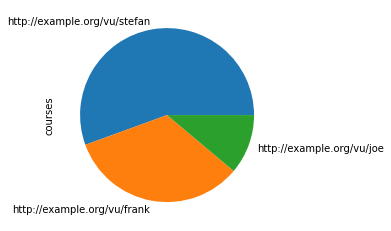

In [3]:
# Pandas visualization: https://pandas.pydata.org/docs/user_guide/visualization.html
courseload.set_index('teacher', inplace=True)
courseload['courses'].plot.pie()

### Task 4a (1 point): Make a horizontal bar chart from the courseload dataframe

<AxesSubplot:ylabel='teacher'>

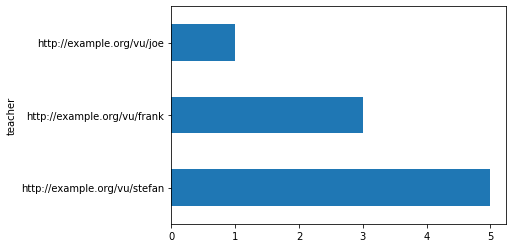

In [6]:
courseload['courses'].plot.barh()

### Task 4b: Write a new SPARQL query for DBpedia and create an interesting chart from it

In [7]:
%%sparql http://dbpedia.org/sparql/ -q -s dbpedia_currency_stats
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbp: <http://dbpedia.org/property/>

SELECT  DISTINCT ?currency (COUNT(?country) as ?currency_count)
     WHERE {
        ?currency a dbo:Currency .
        ?currency dbo:usingCountry ?country .
}
GROUP BY ?currency
ORDER BY DESC (?currency_count)
LIMIT 7

<AxesSubplot:ylabel='currency_count'>

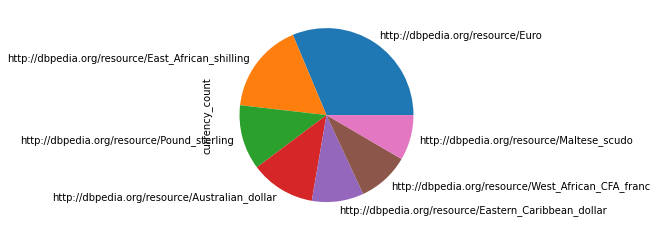

In [8]:
# Pandas visualization chart
dbpedia_currency_stats.set_index('currency', inplace=True)
dbpedia_currency_stats['currency_count'].plot.pie()

## Task 5 (1 point). Pandas styling
Below is some code that shows a colored table.

**Task:** Add a column with the percentage of the area of the country that is water.
The background color of this column depend on its value: it should be greener if more of the country is land, and bluer if more of the country is water.

In [9]:
%%sparql http://dbpedia.org/sparql/ -q -s dbpedia_countries
PREFIX dct: <http://purl.org/dc/terms/>
PREFIX dcb: <http://dbpedia.org/resource/Category:>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbp: <http://dbpedia.org/property/>

SELECT DISTINCT ?name ?area_100k_km2 ?giniCoefficient ?waterPercentage WHERE {
    ?country 
        dct:subject dcb:Current_member_states_of_the_United_Nations ;
        dbo:area ?area ; # area is stated in m^2
        dbo:giniCoefficient ?giniCoefficient ;
        rdfs:label ?name;
        dbo:percentageOfAreaWater ?waterPercentage .
    
    BIND (ROUND(?area/100000000000) AS ?area_100k_km2)
    FILTER(LANG(?name) = 'en')
}
ORDER BY DESC(?area_100k_km2)
LIMIT 50

In [10]:
# Styling: https://pandas.pydata.org/docs/user_guide/style.html
# Using CSS Hue-Saturation-Level colors: https://www.w3schools.com/colors/colors_hsl.asp

def gini_color(gini):
    return f'background: hsl({100 - gini}, 100%, 50%)' 

def water_percentage_color(water):
    return f'background: hsl({130 + water * 4}, 100%, 50%)'

dbpedia_countries.style \
    .applymap(gini_color, subset=(slice(None), "giniCoefficient")) \
    .applymap(water_percentage_color, subset=(slice(None), "waterPercentage"))

# Task 6 (2 points): Folium Map

Below is some code that makes a map. 

**Task:** Make the markers bigger depending on the population of the capital (but keep it readable!)

Tip: use the auto-complete functionality of http://query.wikidata.org

**Bonus (0 points, but lots of honor):** Why does London show up on the map?

In [11]:
%%sparql http://query.wikidata.org/sparql -q -s capitals
SELECT ?capitalLabel ?coords ?population WHERE {
    ?country
        wdt:P463 wd:Q458 ; # member of: European Union
        wdt:P36 ?capitalLabel . # capital: ?capital
        
    ?capitalLabel 
        wdt:P625 ?coords; # coordinate location: ?coordsS
        wdt:P1082 ?population .
  
    # Using Wikidata-only label service
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

In [12]:
%pip install folium

In [13]:
import folium
# Extract latitude and longitude from coordinates in Well-Known Text (WKT) format
capitals_coords = capitals.join(capitals.coords.str.extract('Point\((?P<lon>\S+) (?P<lat>\S+)\)').astype(float))

middle = [capitals_coords['lat'].mean(), capitals_coords['lon'].mean()]
m = folium.Map(location=middle, zoom_start=4)

for _, row in capitals_coords.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius= (float(row['population']))**0.2,
        popup= row['capitalLabel'],
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(m)

m

The result should look a bit like this:

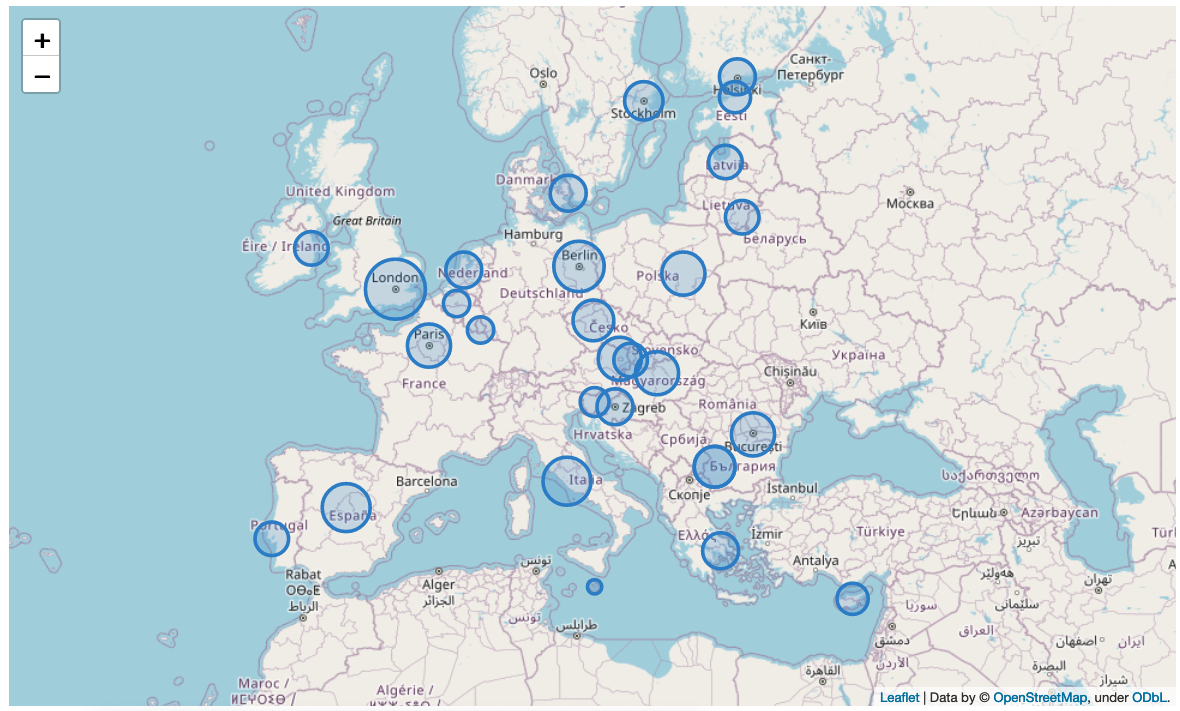